<a href="https://colab.research.google.com/github/assemzh/ProbProg-COVID-19/blob/master/Simulation_and_Policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Simulation Model

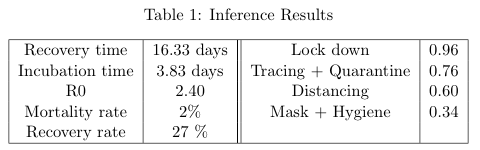

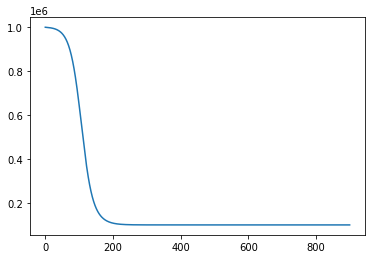

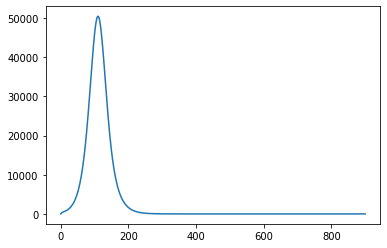

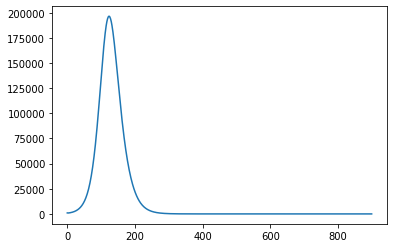

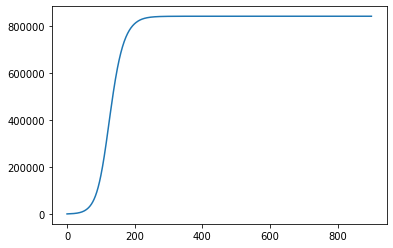

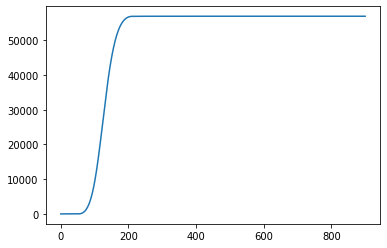

In [15]:
import matplotlib.pyplot as plt
# test_cap = 0.001
hygiene = 0.34    #parameters to be infered
distancing = 0.60 # Canada
lockdown = 0.96
quarantine = 0.76 # Korea

hospital_cap = 2.2/1000
transmission_days = 16.33/2.40
exposed_days = 3.83 
recovery_days = 16.33 
# waning_days = 365

susceptible0 = 0.999
infected0 = 0.001
exposed0 = 0
recovered0 = 0

population = 1000000

def virus_model(days,policy):

  if policy == "hygiene":
    pol = hygiene
  elif policy == "distancing":
    pol = distancing
  elif policy == "lockdown":
    pol = lockdown
  elif policy == "quarantine":
    pol = quarantine
  elif policy == "None":
    pol = None

  transmission_rate = (1/ transmission_days)
  incubation_rate = (1/  exposed_days)
  recovery_rate = (1/ recovery_days)
  # immunity_loss_rate = (1/ waning_days)
  death_rate_with_med = 0.02
  death_rate_without_med = 0.9
  ser_case_rate = 0.15


  r0 = 2.4

  susceptible =  susceptible0
  infected = infected0
  exposed = exposed0
  recovered = recovered0
  dead = 0

  susc= [population * susceptible0]
  exp = [population * exposed0]
  inf = [population * infected0]
  rec = [population * recovered0]
  re = [r0]
  d = [0]
  testing = 0
  
  for day in range(days):
    if 60 < day < 120  and pol != None:
      transmission_rate = (1/ transmission_days) * (1-pol)
    else:
      transmission_rate = (1/ transmission_days)
    
    S2E = susceptible * infected * transmission_rate
    E2I = exposed * incubation_rate
    # I2R = infected*recovery_rate
    if (ser_case_rate*infected < hospital_cap):
      I2D = ser_case_rate*infected*death_rate_with_med/30
    else:
      I2D = hospital_cap*death_rate_with_med/30 + (ser_case_rate*infected - hospital_cap) * death_rate_without_med/30
    I2R = (infected - I2D*30)*recovery_rate
    exposed +=  S2E
    susceptible -= S2E
    infected += E2I
    exposed -= E2I
    recovered += I2R
    infected -= I2R
    infected -= I2D
    dead += I2D

    re.append((transmission_rate/ recovery_rate)*susceptible)
    susc.append(population* susceptible)
    exp.append(population* exposed)
    inf.append(population* infected)
    rec.append(population* recovered)
    d.append(population* dead)
  
  return susc, exp, inf, rec, d, re

days = 900

result_h = virus_model(days,'hygiene')
result_d = virus_model(days,'distancing')
result_l = virus_model(days,'lockdown')
result_q = virus_model(days,'quarantine')
result_0 = virus_model(days,'None')

m = [m for m in range(days+1)]

result = result_0
plt.plot(m, result[0], label="line S")
plt.plot()
plt.show()

plt.plot(m, result[1], label="line E")
plt.plot()
plt.show()

plt.plot(m, result[2], label="line I")
plt.plot()
plt.show()

plt.plot(m, result[3], label="line R")
plt.plot()
plt.show()

plt.plot(m, result[4], label="line D")
plt.plot()
plt.show()

# plt.plot(m, result[5], label="line Re")
# plt.plot()
# plt.show()

# Policy Efficacy check

Note: Output in thousands

In [16]:
test_cap = 0.001
hygiene = 0.34   #parameters to be infered
distancing = 0.6 # Canada
lockdown = 0.96
quarantine = 0.76 # Korea

hospital_cap = 2* 1/3400
transmission_days = 16.33/2.40
exposed_days = 3.83 
recovery_days = 16.33
# waning_days = 365

susceptible0 = 0.99
infected0 = 0.01
exposed0 = 0
recovered0 = 0

population = 1000000


def virus_model(hygiene_list, distancing_list,lockdown_list,quarantine_list):

  assert len(hygiene_list) == len(distancing_list) == len(lockdown_list) == len(quarantine_list)

  duration = len(hygiene_list)

  
  transmission_rate0 = (1/ transmission_days)
  incubation_rate = (1/  exposed_days)
  recovery_rate = (1/ recovery_days)
  death_rate_with_med = 0.02
  death_rate_without_med = 0.9
  ser_case_rate = 0.15

  r0 = 2.40

  susceptible =  susceptible0
  infected = infected0
  exposed = exposed0
  recovered = recovered0
  dead = 0

  susc= [population * susceptible0]
  exp = [population * exposed0]
  inf = [population * infected0]
  rec = [population * recovered0]
  re = [r0]
  d = [0]
  policy = []
  
  testing = 0

  for day in range(duration):
    # if test_cap < infected + exposed:
    #   transmission_rate = transmission_rate0
    # else:
    #   transmission_rate = transmission_rate0
    transmission_rate = transmission_rate0 * (1- hygiene_list[day]) * (1- distancing_list[day]) * (1- lockdown_list[day]) * (1- quarantine_list[day])
    ld_point = - population * 0.1 * 30 /365
    qr_point = - population * infected * 0.1
    hg_point = - population * 0.002
    dst_point = - population * 0.1 * 10 /365
  
    policy_point = hg_point * hygiene_list[day] + dst_point * distancing_list[day] + ld_point*lockdown_list[day] + qr_point*quarantine_list[day]
    susceptible = susceptible - susceptible * infected * transmission_rate 
    exposed = exposed + susceptible * infected * transmission_rate
    exposed = exposed - exposed * incubation_rate

    infected = infected + exposed * incubation_rate 
    infected = infected - infected * recovery_rate

    if (ser_case_rate*exposed * incubation_rate < hospital_cap):
      dead = dead + ser_case_rate*exposed * incubation_rate * death_rate_with_med
      infected = infected - ser_case_rate*exposed * incubation_rate * death_rate_with_med
    else:
      dead = dead + hospital_cap*death_rate_with_med + (exposed * incubation_rate * ser_case_rate - hospital_cap) * death_rate_without_med
      infected = infected - hospital_cap*death_rate_with_med + (exposed * incubation_rate * ser_case_rate - hospital_cap) * death_rate_without_med

    

    recovered = recovered + infected * recovery_rate
    # recovered -= recovered * immunity_loss_rate

    # susceptible += recovered * immunity_loss_rate

    re.append((transmission_rate/ recovery_rate)*susceptible)
    susc.append(population* susceptible)
    exp.append(population* exposed)
    inf.append(population* infected)
    rec.append(population* recovered)
    d.append(population* dead)
    policy.append(policy_point)
  
  return susc, exp, inf, rec, d, re, policy

import numpy as np
def evaluate(inf, rec, d, policy):

  dd_point = -7000
  inf_point = -0.3

  result = sum(inf)*inf_point + d[-1]*dd_point + sum(policy)
  return result

# from torch.distributions import constraints

result = np.zeros((3,3,3,3,3,3,3,3,3,3,3,3), dtype = float)
for index, value in np.ndenumerate(result):
  h1, h2, h3, d1, d2, d3, l1, l2, l3, q1, q2, q3 = index
  hygiene_list = [h1/2]*30 + [h2/2]*30 + [h3/2]*30
  distancing_list = [d1/2]*30 + [d2/2]*30 + [d3/2]*30
  lockdown_list = [l1/2]*30 + [l2/2]*30 + [l3/2]*30
  quarantine_list = [q1/2]*30 + [q2/2]*30 + [q3/2]*30
  susc, exp, inf, rec, d, re, policy = virus_model(hygiene_list, distancing_list,lockdown_list,quarantine_list)        
  point = evaluate(inf, rec, d, policy)
  result[h1, h2, h3, d1, d2, d3, l1, l2, l3, q1, q2, q3] = point
print(result[0,0,0,0,0,0,0,0,0,0,0,0])
loss = np.max(result)
arg =  np.unravel_index(result.argmax(), result.shape)
print(loss, arg)


-7592712.053893381
-65108.814179527064 (0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2)


In [ ]:
# def model():
#         h1 = pyro.sample("h1",dist.Normal(0.5, 0.25))
#         h2 = pyro.sample("h2",dist.Normal(0.5, 0.25))
#         h3 = pyro.sample("h3",dist.Normal(0.5, 0.25))

#         d1 = pyro.sample("d1",dist.Normal(0.5, 0.25))
#         d2 = pyro.sample("d2",dist.Normal(0.5, 0.25))
#         d3 = pyro.sample("d3",dist.Normal(0.5, 0.25))
        
#         l1 = pyro.sample("l1",dist.Normal(0.5, 0.25))
#         l2 = pyro.sample("l2",dist.Normal(0.5, 0.25))
#         l3 = pyro.sample("l3",dist.Normal(0.5, 0.25))
        
#         q1 = pyro.sample("q1",dist.Normal(0.5, 0.25))
#         q2 = pyro.sample("q2",dist.Normal(0.5, 0.25))
#         q3 = pyro.sample("q3",dist.Normal(0.5, 0.25))
        
#         hygiene_list = [h1]*30 + [h2]*30 + [h3]*30
#         distancing_list = [d1]*30 + [d2]*30 + [d3]*30
#         lockdown_list = [l1]*30 + [l2]*30 + [l3]*30
#         quarantine_list = [q1]*30 + [q2]*30 + [q3]*30

#         susc, exp, inf, rec, d, re, policy = virus_model(hygiene_list, distancing_list,lockdown_list,quarantine_list)
        
#         point = evaluate(inf, rec, d, policy)
#         with pyro.plate('plate'):
#           pyro.sample("obs", dist.Normal(point, 10000), obs = torch.tensor(0.))
# def guide():
#         gh1 = pyro.param("gh1", torch.tensor(0.5), constraint=constraints.positive)
#         gh2 = pyro.param("gh2", torch.tensor(0.5), constraint=constraints.positive)
#         gh3 = pyro.param("gh3", torch.tensor(0.5), constraint=constraints.positive)
#         gd1 = pyro.param("gd1", torch.tensor(0.5), constraint=constraints.positive)
#         gd2 = pyro.param("gd2", torch.tensor(0.5), constraint=constraints.positive)
#         gd3 = pyro.param("gd3", torch.tensor(0.5), constraint=constraints.positive)
#         gl1 = pyro.param("gl1", torch.tensor(0.5), constraint=constraints.positive)
#         gl2 = pyro.param("gl2", torch.tensor(0.5), constraint=constraints.positive)
#         gl3 = pyro.param("gl3", torch.tensor(0.5), constraint=constraints.positive)
#         gq1 = pyro.param("gq1", torch.tensor(0.5), constraint=constraints.positive)
#         gq2 = pyro.param("gq2", torch.tensor(0.5), constraint=constraints.positive)
#         gq3 = pyro.param("gq3", torch.tensor(0.5), constraint=constraints.positive)

#         h1 = pyro.sample("h1",dist.Normal(gh1, 0.25))
#         h2 = pyro.sample("h2",dist.Normal(gh2, 0.25))
#         h3 = pyro.sample("h3",dist.Normal(gh3, 0.25))

#         d1 = pyro.sample("d1",dist.Normal(gd1, 0.25))
#         d2 = pyro.sample("d2",dist.Normal(gd2, 0.25))
#         d3 = pyro.sample("d3",dist.Normal(gd3, 0.25))
        
#         l1 = pyro.sample("l1",dist.Normal(gl1, 0.25))
#         l2 = pyro.sample("l2",dist.Normal(gl2, 0.25))
#         l3 = pyro.sample("l3",dist.Normal(gl3, 0.25))
        
#         q1 = pyro.sample("q1",dist.Normal(gq1, 0.25))
#         q2 = pyro.sample("q2",dist.Normal(gq2, 0.25))
#         q3 = pyro.sample("q3",dist.Normal(gq3, 0.25))
        
#         hygiene_list = [h1]*30 + [h2]*30 + [h3]*30
#         distancing_list = [d1]*30 + [d2]*30 + [d3]*30
#         lockdown_list = [l1]*30 + [l2]*30 + [l3]*30
#         quarantine_list = [q1]*30 + [q2]*30 + [q3]*30

#         susc, exp, inf, rec, d, re, policy = virus_model(hygiene_list, distancing_list,lockdown_list,quarantine_list)
        
#         point = evaluate(inf, rec, d, policy)

# from pyro.infer.mcmc import MCMC
# from pyro.infer.mcmc import NUTS
# from pyro.infer import EmpiricalMarginal
# import matplotlib.pyplot as plt
# pyro.clear_param_store()
# hmc_kernel = NUTS(model, step_size=0.9)
# posterior = MCMC(hmc_kernel, 
#                  num_samples=400, 
#                  warmup_steps=50).run()

# samples = {k: v.detach().cpu().numpy() for k, v in posterior.get_samples().items()}
# posterior.summary()
# print(posterior)
# with open('file.pkl', 'wb') as f:
#   dill.dump(posterior, f)

# from pyro.infer import SVI, Trace_ELBO


# svi = SVI(model,
#           guide,
#           pyro.optim.Adam({"lr": .05}),
#           loss=Trace_ELBO())
# pyro.clear_param_store()
# import logging
# num_iters = 5000
# for i in range(num_iters):
#     elbo = svi.step()
#     if i % 500 == 0:
#         logging.info("Elbo loss: {}".format(elbo))